# Euchre Trick Model
Model to estimate the number of tricks a given hand will be able to take  
(or maybe the percent likelihood of each number of tricks taken 0-5)

In [1]:
import pandas as pd

In [2]:
raw_train_df = pd.read_csv('all_hand_results.csv')

In [3]:
raw_train_df.shape

(48176, 14)

In [4]:
raw_train_df.head()

,tricks_won,is_calling_player,teammate_called,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,has_Ttrump,has_9trump,num_off_A,num_off_K,num_off_Q,partner_tricks
0,1,0,1,0,0,0,0,0,0,0,1,2,0,2
1,2,0,0,0,1,0,0,1,0,0,0,1,1,0
2,2,1,0,1,0,0,1,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,2,2
4,2,1,0,1,0,0,1,0,1,0,0,0,1,2


In [5]:
raw_train_df.columns

Index(['tricks_won', 'is_calling_player', 'teammate_called', 'has_right',
       'has_left', 'has_Atrump', 'has_Ktrump', 'has_Qtrump', 'has_Ttrump',
       'has_9trump', 'num_off_A', 'num_off_K', 'num_off_Q', 'partner_tricks'],
      dtype='object')

<AxesSubplot:>

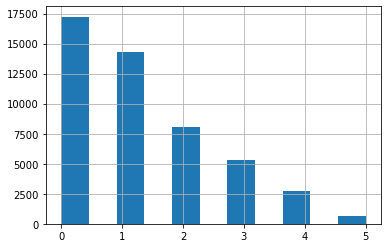

In [29]:
raw_train_df['tricks_won'].hist(bins=11)

### Create train/test/validation splits

In [9]:
model_features = ['has_right', 'has_left',
                  'has_Atrump', 'has_Ktrump', 'has_Qtrump', 'has_Ttrump', 'has_9trump', 
                  'num_off_A', 'num_off_K', 'num_off_Q'
                 ]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_df, test_df, train_targets_df, test_targets_df = train_test_split(raw_train_df[model_features], 
                                                    raw_train_df['tricks_won'], 
                                                    test_size=0.33, random_state=42)

In [12]:
train_df.shape

(32277, 10)

In [13]:
test_df.shape

(15899, 10)

#### Scale Features

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
train_df = sc.fit_transform(train_df)
test_df = sc.transform (test_df)

## Modeling

#### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression().fit(train_df, train_targets_df)

In [18]:
reg.coef_

array([0.69979516, 0.39132638, 0.242542  , 0.36192397, 0.34082793,
       0.32722589, 0.31375537, 0.16051014, 0.22705726, 0.06519248])

In [19]:
test_preds = reg.predict(test_df)

In [20]:
test_preds[0:5]

array([0.76926004, 1.15166919, 1.42730551, 1.89538952, 0.87313307])

### Evalute model

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
mean_absolute_error(y_true=test_targets_df, y_pred=test_preds)

0.5435778322256319

In [23]:
mean_squared_error(y_true=test_targets_df, y_pred=test_preds)

0.485823243109417

In [24]:
r2_score(y_true=test_targets_df, y_pred=test_preds)

0.7020380601757334

#### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=4)),
        ('clf', SVC(kernel = 'linear', C = 1))])

## Next Steps

In [ ]:
# Features - add player position at table, team tricks won

# Standardize input features to linear model
# Tree-based models - RF, GBM, etc.
# Look at feature importance

# PyTorch models
    # compare PyTorch version vs. sklearn
# Classification models to predict likelihood for each score outcome

# Streamlit App to return results
    # how to input cards in hand?
    # bar chart of expected returns